<a href="https://colab.research.google.com/github/MattIzon/16010269_DataAnalytics/blob/main/LR/model8c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model 8c - Used only for Mar
Predictors: day_of_week, max, slp

In [1]:
# Set-up
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

def flat_list(nested_list):
  return [value for sublist in nested_list for value in sublist]

In [10]:
data = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/LR/CC_Normalised_Per_Year/LR8c.csv')

In [11]:
randomised = data.iloc[np.random.permutation(len(data))]

In [12]:
predictors = randomised.iloc[:,0:3]
targets = randomised.iloc[:,3]
train_size = int(len(randomised)*0.8)
qty_predictors = 3
qty_targets = 1

In [13]:
# Design model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(qty_targets, input_shape=[qty_predictors]))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [14]:
# View model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Train model
history = model.fit(predictors.iloc[0:train_size], targets.iloc[0:train_size], epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 4ms/step - loss: 0.9398
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 0.9201
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 0.9056
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 0.8923
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 0.8741
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 0.8614
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8500
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8337
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8200
Epoch 10/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8038
Epoch 11/500
4/4 [==============================] - 0s 6ms/step - loss: 0.8033
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7866
Epoch 13/500
4/4 [==============================] - 0s 4ms/st

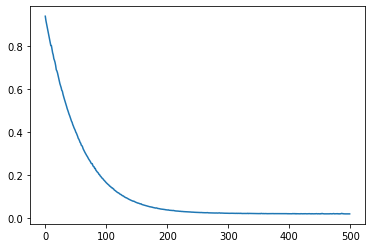

In [20]:
# View training history
plt.plot(history.history['loss'])

In [21]:
# Test model
model_test = flat_list(model.predict(predictors.iloc[train_size:]))

In [22]:
# Analyse model quality vs mean 
rmse = np.sqrt(np.mean((targets[train_size:].values - model_test)**2))
print('LinearRegression has RMSE of {0}'.format(rmse));

avg = np.mean(data['crime_count'][:train_size])

rmse = np.sqrt(np.mean((targets[train_size:].values - avg)**2))
print('Using the training data mean of {0} would have has resulted in a RMSE of {1}'.format(avg, rmse));

LinearRegression has RMSE of 0.14635639751513885
Using the training data mean of 0.3806469316678054 would have has resulted in a RMSE of 0.16488333791554152
